# Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the training dataset

In [3]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:,1:2].values


In [4]:
print(training_set)

[[325.25]
 [331.27]
 [329.83]
 ...
 [793.7 ]
 [783.33]
 [782.75]]


# Feature Scaling

In [5]:
from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)


# Creating a data structure with 60 timesteps and 1 output

In [6]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping

In [11]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))


# Importing the Keras libraries and packages

In [12]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Initialising the RNN

In [20]:
regressor = Sequential()

# Adding the first LSTM  layer and some Dropout regularisation 

In [21]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))        

# Adding a second LSTM layer and some Dropout regularisation

In [22]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation

In [23]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation

In [24]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer

In [25]:
regressor.add(Dense(units = 1))

# Compiling the RNN

In [26]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set

In [27]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 12s 321ms/step - loss: 0.0456
Epoch 2/100
38/38 [==============================] - 13s 350ms/step - loss: 0.0057
Epoch 3/100
38/38 [==============================] - 13s 349ms/step - loss: 0.0056
Epoch 4/100
38/38 [==============================] - 13s 350ms/step - loss: 0.0056
Epoch 5/100
38/38 [==============================] - 13s 348ms/step - loss: 0.0055
Epoch 6/100
38/38 [==============================] - 13s 351ms/step - loss: 0.0049
Epoch 7/100
38/38 [==============================] - 13s 348ms/step - loss: 0.0044
Epoch 8/100
38/38 [==============================] - 13s 339ms/step - loss: 0.0048
Epoch 9/100
38/38 [==============================] - 13s 341ms/step - loss: 0.0045
Epoch 10/100
38/38 [==============================] - 13s 337ms/step - loss: 0.0046
Epoch 11/100
38/38 [==============================] - 12s 328ms/step - loss: 0.0051
Epoch 12/100
38/38 [==============================] - 12s 328ms/step - loss: 0.0041
E

Epoch 99/100
38/38 [==============================] - 8s 220ms/step - loss: 0.0015
Epoch 100/100
38/38 [==============================] - 8s 222ms/step - loss: 0.0015


# Getting the real stock price of 2017

In [28]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

# Getting the predicted stock price of 2017

In [29]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Visualising the results

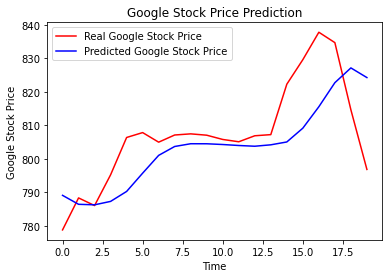

In [30]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()